# Image Classification and Recommendation System on Walmart Products

# Project Description

The aim of the project is to classify Walmart products and to make recommendations based on images and titles. The images are based on 13 categories of sports scraped from Walmart website.

- **Getting data**: Scraped data from the Walmart website using the BlueCart API and collected product information including product titles, categories, and image URLs.

- **Data Preprocessing**: Preprocessed the image data and filtered out GIF images.

- **Image Classification**: Used Convolutional Neural Networks (CNNs) for image classification.

- **Recommendation system**: Utilized a pre-trained VGG16 model for feature extraction in the recommendation system.

In [ ]:
import numpy as np
import pandas as pd
import requests
import urllib
import time
import json
import re
import cv2
from matplotlib import pyplot as plt

---

### Data Scraping and Preprocessing


Scraped data from the Walmart website using BlueCart API for 13 categories.

Preprocessed the image data and filtered out the GIF images:

The function "img_array" is used to download and preprocess images from the image URL collected before. This function downloads images, converts them into arrays, and resizes them to a standard size of 224x224 pixels. This step ensures that all images have the same dimensions to feed into our models.


In [ ]:
product = []
for p in range(1, 26):
    time.sleep(2)
    # set up the request parameters
    params = {
        'api_key': '',  # change the api
        'search_term': 'soccer',  # change the category
        'type': 'search',
        'page': str(p),
    }

    # make the http GET request to BlueCart API
    api_result = requests.get('https://api.bluecartapi.com/request', params)
    print(api_result.json())
    result = api_result.json()
    if result['request_info']['success'] != True:
        print('Fail to get data')
        break
    n_item = len(result['search_results'])
    if p == 1:
        for i in range(n_item):
            category = 'soccer'    # change the label of category
            url = result['search_results'][i]['product']['main_image']
            pattern = r'(&odnBg=)[F]{6}$'
            new_url = re.sub(pattern, r'\1fffff', url)
            title = result['search_results'][i]['product']['title']
            product.append([category, new_url, title])
    else:
        for i in range(4, n_item):
            category = 'soccer'  # change the label of category
            url = result['search_results'][i]['product']['main_image']
            pattern = r'(&odnBg=)[F]{6}$'
            new_url = re.sub(pattern, r'\1fffff', url)
            title = result['search_results'][i]['product']['title']
            product.append([category, new_url, title])

df_product = pd.DataFrame(product, columns=['category', 'image_url', 'title'])

{'request_info': {'success': True, 'credits_used': 77, 'credits_remaining': 23, 'credits_used_this_request': 1}, 'request_parameters': {'search_term': 'soccer', 'type': 'search', 'page': '1'}, 'request_metadata': {'created_at': '2024-04-24T21:34:43.116Z', 'processed_at': '2024-04-24T21:34:54.366Z', 'total_time_taken': 11.25, 'walmart_url': 'https://www.walmart.com/search?q=soccer&page=1'}, 'search_results': [{'position': 1, 'product': {'title': "Franklin Sports Blackhawk Soccer Goal - Pop Up Backyard Soccer Nets - Foldable Indoor + Outdoor Soccer Goals - Portable Adult + Kids Soccer Goal - 4' x 3' Mini Soccer Net - Yellow", 'link': 'https://www.walmart.com/ip/Franklin-Sports-Blackhawk-Soccer-Goal-Pop-Up-Backyard-Nets-Foldable-Indoor-Outdoor-Goals-Portable-Adult-Kids-4-x-3-Mini-Net-Yellow/737714891?athbdg=null%26athbdg%3DL1600_L1600', 'item_id': '737714891', 'product_id': '795RULM6F8ZN', 'images': ['https://i5.walmartimages.com/seo/Franklin-Sports-Blackhawk-Soccer-Goal-Pop-Up-Backyard-N

In [ ]:
df_product.to_csv('./data/soccer.csv')     # change the directory

In [ ]:
df_product

category                                          image_url  \
0      soccer  https://i5.walmartimages.com/seo/Franklin-Spor...   
1      soccer  https://i5.walmartimages.com/seo/BOHEN-6x4FT-P...   
2      soccer  https://i5.walmartimages.com/seo/Fisca-Kids-So...   
3      soccer  https://i5.walmartimages.com/seo/Hengguang-2-P...   
4      soccer  https://i5.walmartimages.com/seo/Umbro-Ceramic...   
...       ...                                                ...   
1133   soccer  https://i5.walmartimages.com/asr/9516817b-69c5...   
1134   soccer  https://i5.walmartimages.com/asr/820d0d8e-e630...   
1135   soccer  https://i5.walmartimages.com/asr/bc853282-b4b7...   
1136   soccer  https://i5.walmartimages.com/asr/ae02a28c-d97b...   
1137   soccer  https://i5.walmartimages.com/seo/Jokapy-Youth-...   

                                                  title  
0     Franklin Sports Blackhawk Soccer Goal - Pop Up...  
1     BOHEN 6x4FT Portable Soccer Goal for Kids Back...  
2     Fisca Kids Soccer Goals, 4'x3' Pop-up Soccer P...  
3     Hengguang 2 Pairs Kids Soccer Shin Guards with...  
4     Umbro Ceramica 2.0 Size 5 Youth and Beginner S...  
...                                                 ...  
1133  2Pcs Soccer Football Goal Net Kit Set Foldable...  
1134   Vallerta Backyard Soccer Net [NET ONLY] (10'X6')  
1135                  Sport Squad Easy-Fold Soccer Goal  
1136  GoSports Premier Soccer Ball with Premium Pump...  
1137  Jokapy Youth Goalkeeper Gloves, Anti-Slip Socc...  

[1138 rows x 3 columns]

---

#### Getting data image


In [ ]:
# creating a function to download the image links from the dataset
def img_array(img):
    """
    This function takes in an image and converts the image to an array after resizing

    """
    try:
        response = urllib.request.urlopen(img)
        image = np.asarray(bytearray(response.read()), dtype="uint8")
        image_bgr = cv2.imdecode(image, cv2.IMREAD_COLOR)
        # resizing all images to one size
        image_bgr = cv2.resize(image_bgr, (224, 224))
        return image_bgr
    except:
        print(img)
        return None


df_product = pd.read_csv('./data/merged_data.csv')
image_array = []
data_array = []
for i, row in df_product.iterrows():
    image = img_array(row['image_url'])
    if image is not None:
        print(i)
        image_array.append(image)
        data_array.append([row['category'], row['title']])

img_arr = np.array(image_array)

In [ ]:
img_arr = np.array(image_array)

In [ ]:
np.save('image_array', img_arr)

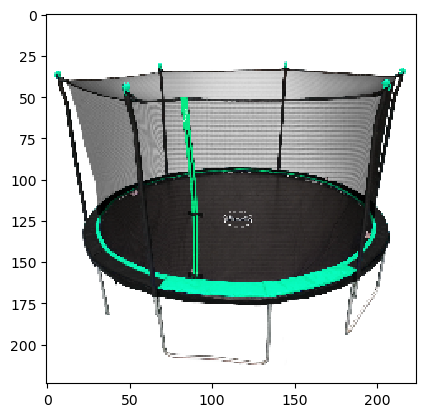

In [ ]:
plt.imshow(img_arr[0], interpolation='nearest')
plt.show()

In [ ]:
df_data = pd.DataFrame(data_array, columns=['category', 'title'])
df_data.to_csv('./filter_data.csv')

In [ ]:
df_data

category                                              title
0        trampoline    Bounce Pro 14ft Trampoline With Enclosure Combo
1        trampoline  Bounce Pro 12' Trampoline with Enclosure Combo...
2        trampoline    Bounce Pro 14ft Trampoline with Flash Lite Zone
3        trampoline  YORIN Trampoline, 1200LBS 12FT 14FT 15FT 16FT ...
4        trampoline  Seizeen Outdoor Trampoline for Kids, 12FT Roun...
...             ...                                                ...
13376  outdoor_toys  stargo Sand Digger Kids Excavator Ride on Toy,...
13377  outdoor_toys  Costway Inflatable Bouncy Castle Kids Jumping ...
13378  outdoor_toys  Aljoin Trampoline Paddles for 4 Players,Bouncy...
13379  outdoor_toys  Princess Tent Girls Large Playhouse Kids Castl...
13380  outdoor_toys  Gorilla Playsets Ozark II Wooden Swing Set wit...

[13381 rows x 2 columns]

---
# EDA
### WordCloud


In [7]:
df_data = pd.read_csv("./filter_data/filter_data.csv")

In [8]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np
from os import path

In [9]:
def product_join(name):
    """
    This functions takes apparel type and returns product name joined with a space

    """
    return " ".join(t for t in df_data[df_data["category"] == name].title)

In [13]:
# Function to load an image and convert it to a numpy array
def load_image(image_path):
    try:
        return np.array(Image.open(image_path))
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return None


# List of image file names
image_names = [
    "trampoline.jpeg", "boat.jpeg", "swimming_pools.jpeg", "shooting.jpeg",
    "pickball.jpeg", "ball.jpeg", "basketball.jpeg", "camping.jpeg",
    "hunting.jpeg", "soccer.jpeg", "fishing.jpeg", "swing.jpeg", "outdoor1.jpeg"
]

# List of corresponding names
list_name = [
    "trampoline", "boats", "swimming_pools", "sports_shooting",
    "pickleball", "football", "basketball", "Camping",
    "Hunting", "soccer", "Fishing", "swing_sets", "outdoor_toys"
]

# Base directory for the images
base_dir = "/Users/frankbiew/Desktop/"

# Load all images into a list
list_masks = [load_image(path.join(base_dir, image_name))
              for image_name in image_names]

# Filter out any None values in case of errors
list_masks = [mask for mask in list_masks if mask is not None]

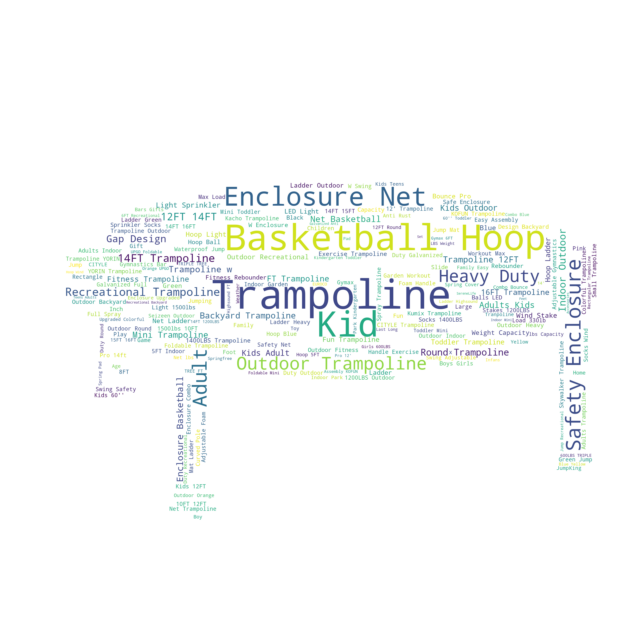

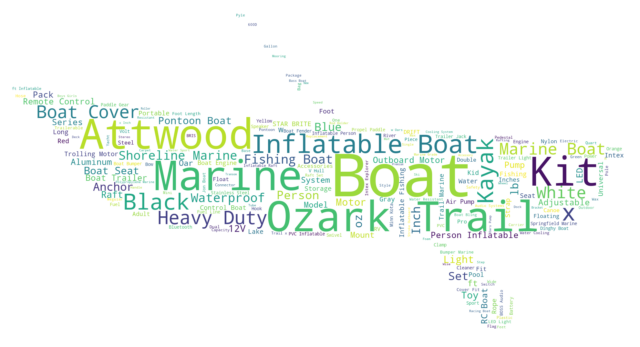

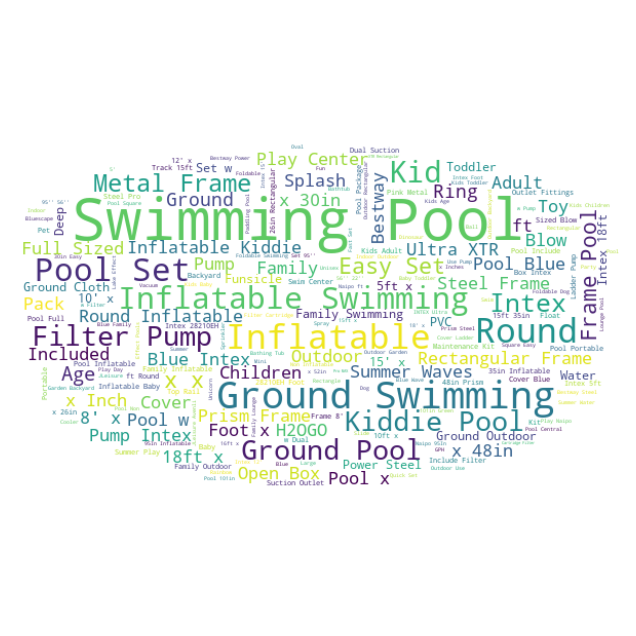

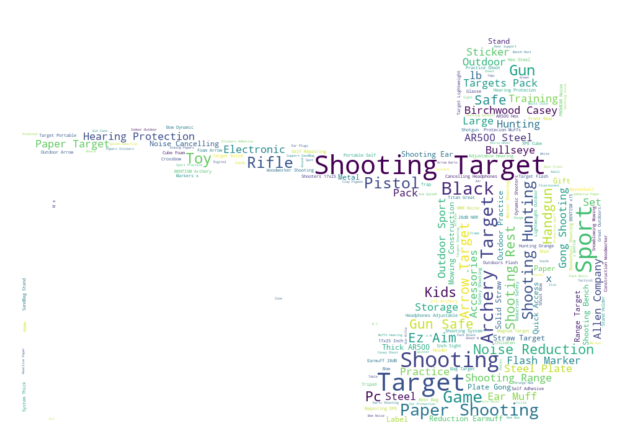

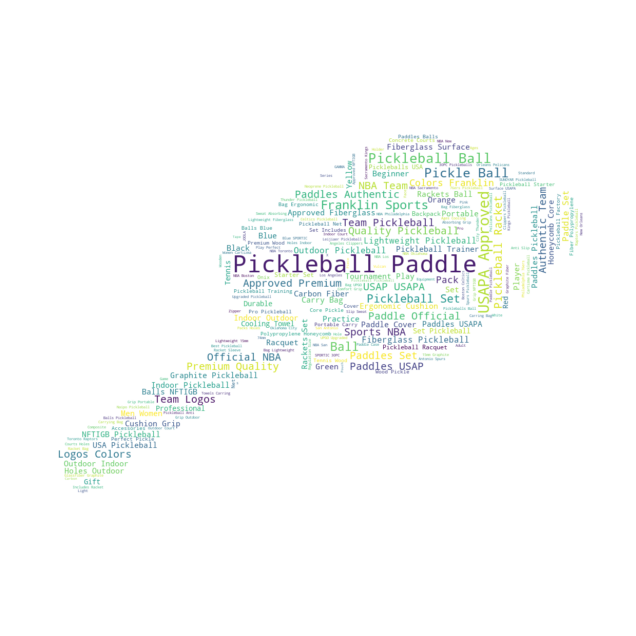

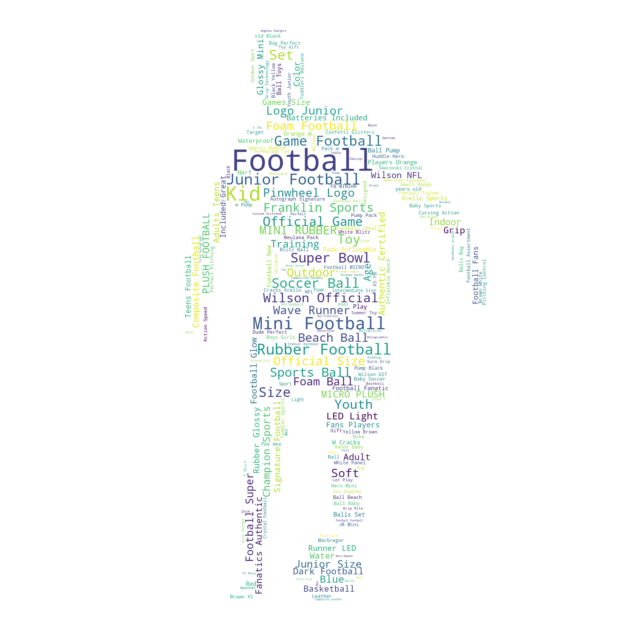

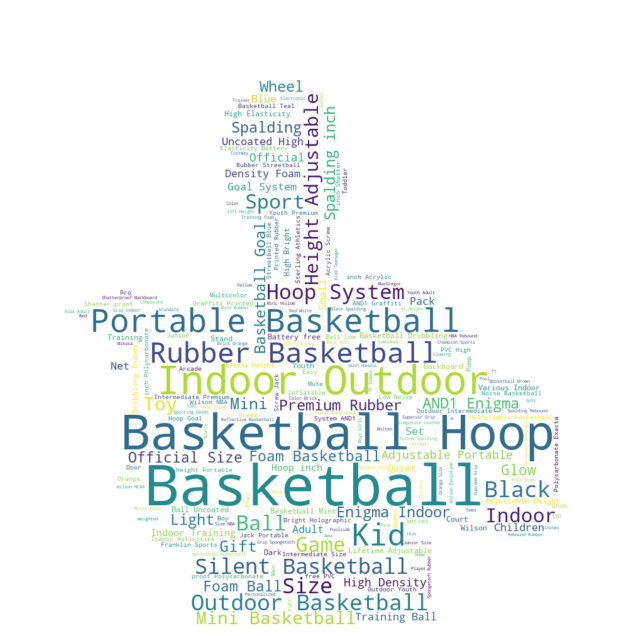

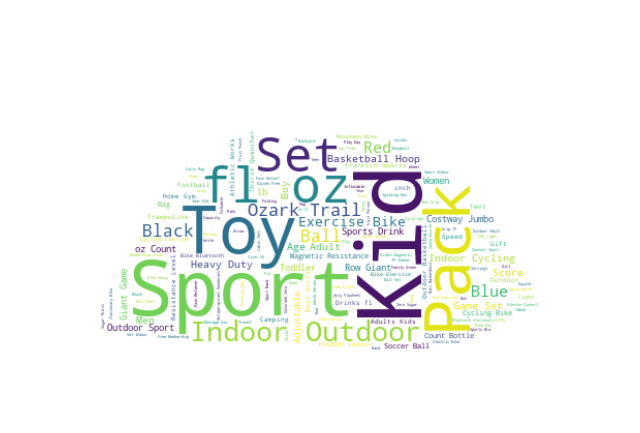

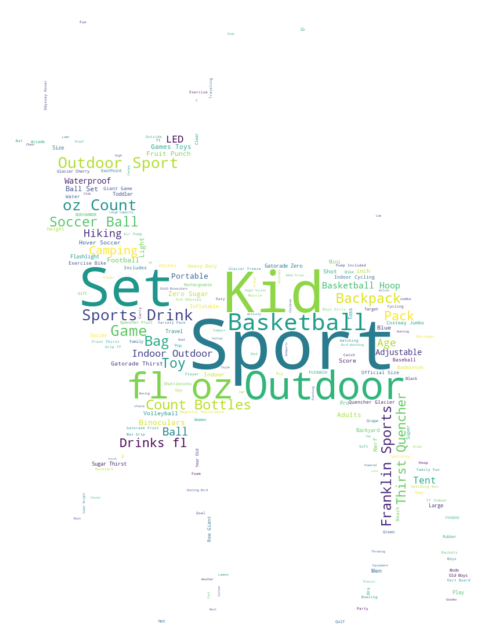

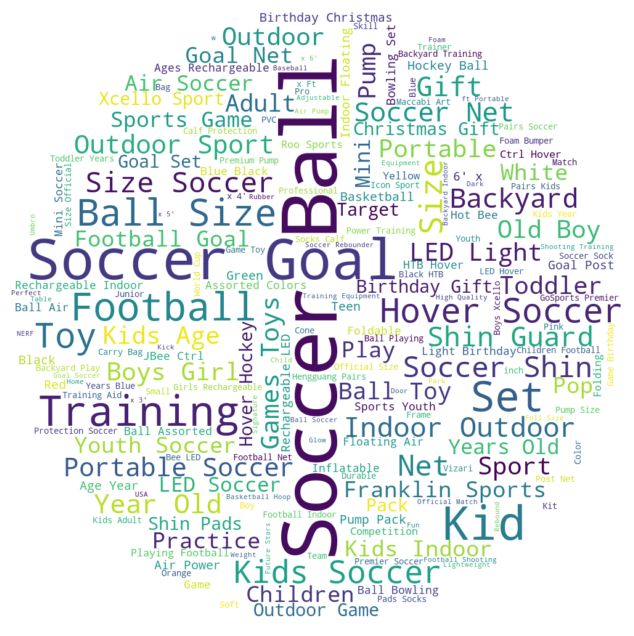

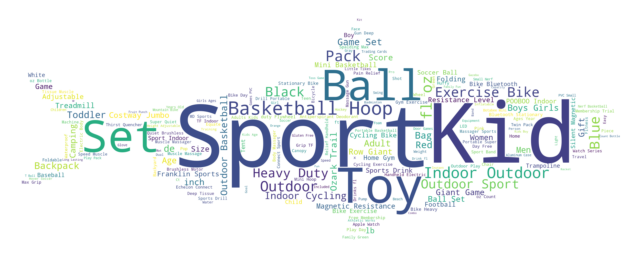

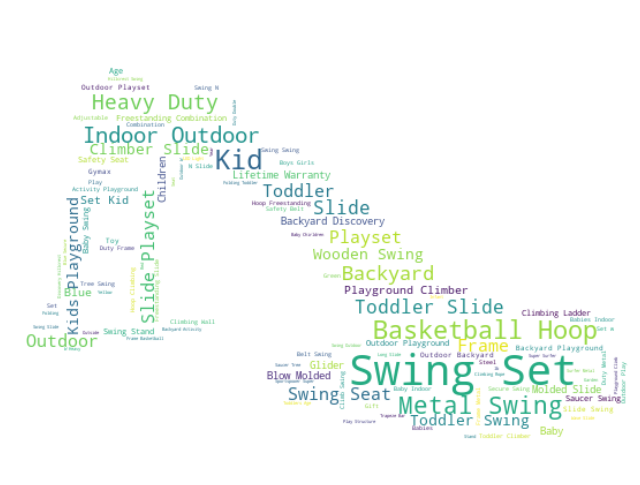

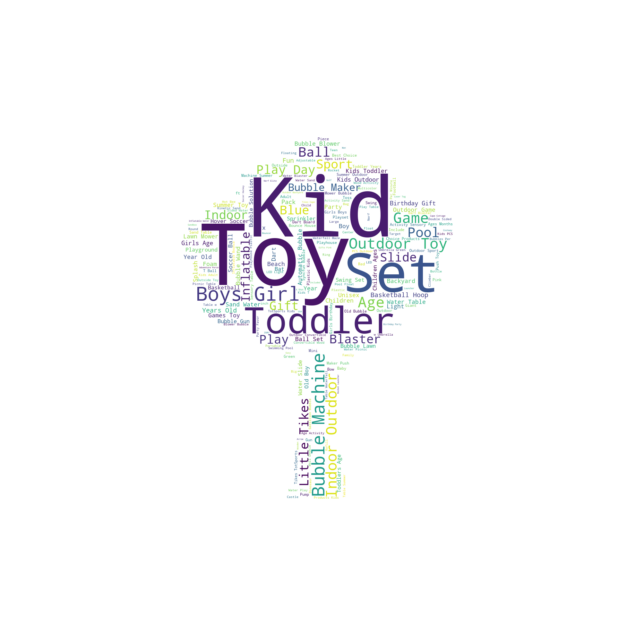

In [14]:
for i in range(len(list_masks)):
    wordcloud = WordCloud(background_color="white",  mask=list_masks[i]).generate(
        product_join(list_name[i]))
    plt.figure(figsize=[8, 8])
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

---

# Image Classification


In [ ]:
import numpy as np
import pandas as pd
import urllib
import numpy as np
import cv2
import tensorflow as tf

In [ ]:
df = pd.read_csv('/Users/tingpan/Desktop/USF/DL/project/filter_data.csv')
df.head()

Unnamed: 0    category                                              title
0           0  trampoline    Bounce Pro 14ft Trampoline With Enclosure Combo
1           1  trampoline  Bounce Pro 12' Trampoline with Enclosure Combo...
2           2  trampoline    Bounce Pro 14ft Trampoline with Flash Lite Zone
3           3  trampoline  YORIN Trampoline, 1200LBS 12FT 14FT 15FT 16FT ...
4           4  trampoline  Seizeen Outdoor Trampoline for Kids, 12FT Roun...

In [ ]:
categorys = df.category.unique()
categorys

array(['trampoline', 'boats', 'swimming_pools', 'sports_shooting',
       'pickleball', 'football', 'basketball', 'Camping', 'Hunting',
       'soccer', 'Fishing', 'swing_sets', 'outdoor_toys'], dtype=object)

In [ ]:
# load image array
image_arr = np.load('/Users/tingpan/Desktop/USF/DL/project/image_array.npy')

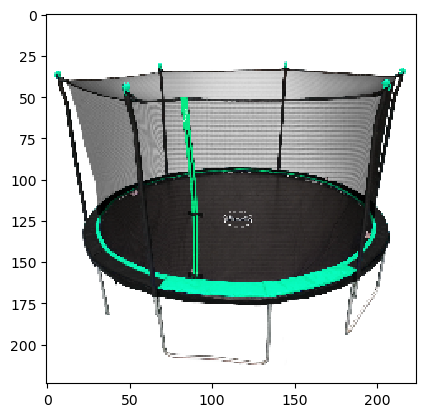

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(image_arr[0], interpolation='nearest')
plt.show()

In [ ]:
# Converting the response variable into numbers
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder to the 'category' column and transform it
df['category'] = label_encoder.fit_transform(df['category'])

# Display the first few rows of the DataFrame
df.head()

Unnamed: 0  category                                              title
0           0        12    Bounce Pro 14ft Trampoline With Enclosure Combo
1           1        12  Bounce Pro 12' Trampoline with Enclosure Combo...
2           2        12    Bounce Pro 14ft Trampoline with Flash Lite Zone
3           3        12  YORIN Trampoline, 1200LBS 12FT 14FT 15FT 16FT ...
4           4        12  Seizeen Outdoor Trampoline for Kids, 12FT Roun...

In [ ]:
df['category'].unique()

array([12,  4, 10,  9,  7,  5,  3,  0,  2,  8,  1, 11,  6])

# **Methods**

### 1. **Rationale behind our model choices**

- Convolutional Neural Networks(CNNs) for Image classification
  - We chose CNNs for the image classification because they perform well at image classification by capturing spatial hierarchies of features through convolutional layers. These layers employ learnable filters to automatically extract relevant features from input images. Leveraging shared weights and local connectivity, CNNs efficiently learn hierarchical representations of visual features. They begin by detecting low-level features like edges and textures in early layers and progress to identifying more complex features like shapes and objects in deeper layers, enabling accurate classification into distinct categories.
- Pre-trained VGG16 Model for Feature Extractions in Recommendation system
  - We chose the pre-trained VGG16 models in the recommendation system because they were trained extensively on the ImageNet dataset, ensuring they've learned rich and generalizable features from diverse images. By extracting features from these models, we harness high-level semantic information from images to compute similarities between products efficiently. This approach saved us computational resources and training time by leveraging the pre-trained model's parameters instead of training a new model a potentially smaller dataset.

### 2. **Algorithms**

- For the **image classification**, the algorithms that were used included the backpropagation algorithm used for training neural networks, the gradient descent optimization algorithm for minimizing the loss function, and the convolution operation employed in convolutional neural networks (CNNs) for feature extraction from images.
- For the **recommendation system**, the algorithms used included the content-based filtering methods (cosine similarity) for computing similarity between items.

### 3. **Techniques**

- The following techniques were used in our project.
  - Word Embeddings: Word2Vec was used in the recommendation system for representing words as dense vectors in a continuous vector space.
  - Transfer Learning: Pre-trained convolutional neural network (CNN) model, VGG, was used as feature extractors for the image classification task.

### 4. **Frameworks**

- We used TensorFlow as our framework. The primary functionalites that we used included tensorflow.keras.models.Sequential, tensorflow.keras.layers, tensorflow.losses, tensorflow.random.set_seed, tensorflow.keras.metrics, tensorflow.keras.optimizers, tensorflow.keras.regularizers, tensorflow.keras.applications and tensorflow.keras.models.


# **Model Implementation**

**I. Image Classification component: Convolutional Neural Network (CNN)**

- **1. Model Architecture:**
  - **Convolutional Layers**: Three convolutional layers are employed. The first layer has 64 filters, followed by max-pooling with a (2, 2) window size and 20% dropout. The subsequent layers have double the number of filters and follow the same pattern.
  - **Fully Connected Layers**: After flattening the output from the convolutional layers, there is a dense layer with 64 neurons activated by ReLU, followed by a 20% dropout.
  - **Output Layer**: The output layer consists of 13 neurons, corresponding to the number of classes in the dataset, with softmax activation.
- **2. Rationale and Modifications:**
  - **Regularization**: L1 regularization is applied to the convolutional layer to prevent overfitting by penalizing large weights.
  - **Dropout**: Dropout layers with a dropout rate of 20% are inserted after each max-pooling layer and the fully connected layer to further mitigate overfitting.
  - **Activation Function**: ReLU activation is chosen for all layers except the output layer, where softmax is used to get class probabilities.
- **3. Optimize model performance by tuning hyperparameters:**
  - **Hyperparameters**: dense_units, dropout rate, filters, learning rate
  - **Best combination**: dense_units=64, dropout rate=0.2, filters = 64, learning rate= 0.001
- **4. References to external code repository:**
  https://github.com/divyar2630/Amazon-apparel-Image-Classification-and-Product-Recommendation/blob/main/Amazon-apparel-image-classification-product-recommendation.ipynb


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data
train_images, test_images, train_labels, test_labels = train_test_split(
    image_arr, df.category, test_size=0.30, random_state=42)

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, losses
from tensorflow.random import set_seed
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import ParameterGrid

In [ ]:
# Optimize model performance by tuning hyperparameters for the CNN

def create_model(dense_units=64, dropout=0.2, filters=32, learning_rate=0.001):
    # Define the model
    cnn = Sequential()

    # The convolutional layers
    cnn.add(layers.Conv2D(filters=filters, kernel_size=(
        3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l1(1e-5)))
    cnn.add(layers.MaxPooling2D(pool_size=(2, 2)))
    cnn.add(layers.Dropout(dropout))

    cnn.add(layers.Conv2D(filters=filters*2,
            kernel_size=(3, 3), activation='relu'))
    cnn.add(layers.MaxPooling2D(pool_size=(2, 2)))
    cnn.add(layers.Dropout(dropout))

    cnn.add(layers.Conv2D(filters=filters, kernel_size=(3, 3), activation='relu'))
    cnn.add(layers.MaxPooling2D(pool_size=(2, 2)))
    cnn.add(layers.Dropout(dropout))

    # The fully connected layers
    cnn.add(layers.Flatten())
    cnn.add(layers.Dense(dense_units, activation='relu'))
    cnn.add(layers.Dropout(dropout))
    cnn.add(layers.Dense(13, activation='softmax'))

    # Compile the model
    cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(
                    from_logits=True),
                metrics=['accuracy'])

    return cnn


# Define the parameter grid
param_grid = {
    'dense_units': [32, 64],
    'dropout': [0.2, 0.3],
    'filters': [32, 64],
    'learning_rate': [0.001, 0.0001]
}

# Try different parameters
for params in ParameterGrid(param_grid):
    model = create_model(**params)

    # Train the model
    history = model.fit(train_images, train_labels, epochs=3, validation_split=0.2,
                        callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3))

    # Retrieve the validation accuracy from the history object
    val_accuracy = history.history['val_accuracy'][-1]

In [ ]:

set_seed(42)  # setting the seed
cnn = Sequential()

# The convolutional layers
cnn.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',
        input_shape=train_images[0].shape, kernel_regularizer=regularizers.l1(1e-4)))
cnn.add(layers.MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(.20))

cnn.add(layers.Conv2D(64*2, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(Dropout(.20))

cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(Dropout(.20))

# The fully connected layers
cnn.add(layers.Flatten())
cnn.add(layers.Dense(64, activation='relu'))
cnn.add(Dropout(.20))
cnn.add(layers.Dense(13, activation='softmax'))

# **Experiments and Results**

### **Results**:

- Model Training Performance:

| Experiment | Train Accuracy | Validation Accuracy | Train Loss | Validation Loss |
| ---------- | -------------- | ------------------- | ---------- | --------------- |
| Base Model | 72.02%         | 52.29%              | 0.8540     | 1.8072          |

```
   (1) The base model achieved a training accuracy of 72.02% and a validation accuracy of 52.29% after 10 epochs
   (2) Early stopping was employed to prevent overfitting
   (3) Training will be stopped if three consecutive epochs of no improvement in validation accuracy
```

- Model Testing Performance:

| Test Accuracy: | 52.52% |
| -------------- | ------ |
| Test Loss:     | 1.7492 |

### **Performance Visualizations**:

- **Training and Validation Loss Curves**:

  - The loss curves demonstrate the convergence of training and validation losses over epochs.
  - In our experiment, the training set loss consistently decreased as the number of epochs increased, indicating the model's ability to fit the training data. However, the validation set loss plateaued after approximately epoch 3, hovering around 1.6 to 1.8 until the end of training. This observation suggests potential overfitting as the model's performance on unseen data did not improve beyond a certain point.
  - A decrease in loss indicates the improvement of the model's predictive performance, but the lack of decrease in validation loss after a certain point indicates that the model may have reached its limit in generalization ability.

- **Confusion Matrix**:

  - The confusion matrix visualizes the model's performance across different classes.
  - **Diagonal Elements (Correctly Classified Instances)**: The values along the diagonal from the upper-left corner to the lower-right corner represent the number of instances correctly classified for each class. For example, the first value of 105 indicates that 105 instances of class 0 were correctly classified, the second value of 76 indicates 76 instances of class 1 were correctly classified, and so on. Larger values along the diagonal indicate that the model is performing well in correctly identifying instances of those particular classes.
  - **Off-Diagonal Elements (Misclassified Instances)**: The values off the diagonal represent the number of instances that were misclassified as belonging to a different class. For example, the value of 4 at the intersection of class 0 and class 2 indicates that 4 instance of class 0 was misclassified as class 2. Smaller values off the diagonal suggest that misclassifications between certain classes are less common.
  - The high values along the diagonal indicate that the model performs relatively well in correctly classifying instances for most classes. However, the presence of non-negligible values off the diagonal suggests that the model still makes misclassifications, albeit to a lesser extent. Classes with larger misclassification values may indicate areas where the model struggles to differentiate between similar classes or where the training data may be imbalanced. Further analysis of misclassified instances and potential adjustments to the model or training data may help improve overall classification performance.


In [ ]:
# Compile the model
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss=tf.keras.losses.SparseCategoricalCrossentropy(
                from_logits=True),
            metrics=['accuracy'])

# Fit the model
model = cnn.fit(train_images, train_labels, epochs=10, validation_split=0.2,  # taking 20 percent of training set for validation
                callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 77s 324ms/step - accuracy: 0.0937 - loss: 2.7206 - val_accuracy: 0.1734 - val_loss: 2.3881
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 75s 320ms/step - accuracy: 0.2396 - loss: 2.2930 - val_accuracy: 0.3735 - val_loss: 1.9845
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 75s 320ms/step - accuracy: 0.4133 - loss: 1.8496 - val_accuracy: 0.4392 - val_loss: 1.7597
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 76s 321ms/step - accuracy: 0.4995 - loss: 1.5868 - val_accuracy: 0.4856 - val_loss: 1.6927
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 75s 320ms/step - accuracy: 0.5503 - loss: 1.3990 - val_accuracy: 0.4984 - val_loss: 1.6958
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 76s 321ms/step - accuracy: 0.5965 - loss: 1.2382 - val_accuracy: 0.4899 - val_loss: 1.7906
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 76s 324ms/step - accuracy: 0.6421 - loss: 1.1095 - val_accuracy: 0.5160 - val_loss: 1.7746
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 85s 361ms/step - accuracy: 0.6604 - loss: 1

In [ ]:
# Prediction on the test image
cnn_pred = cnn.predict(test_images, verbose=1)
# this will pick the value in an array having the maximum score
cnn_pred = np.argmax(cnn_pred, axis=1)

126/126 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step


In [ ]:
# test accuracy
cnn.evaluate(test_images, test_labels)

126/126 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - accuracy: 0.5252 - loss: 1.7492


[1.795685052871704, 0.5188044905662537]

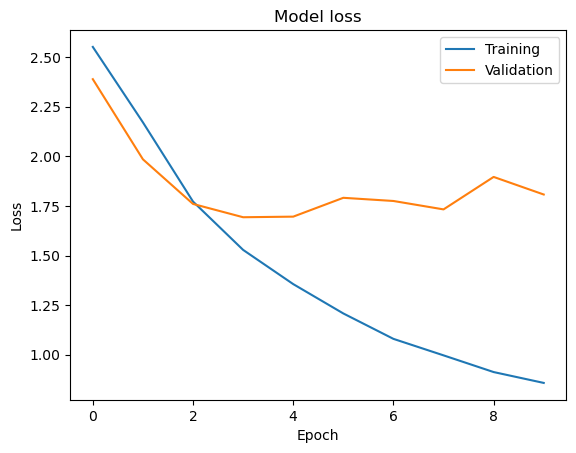

In [ ]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

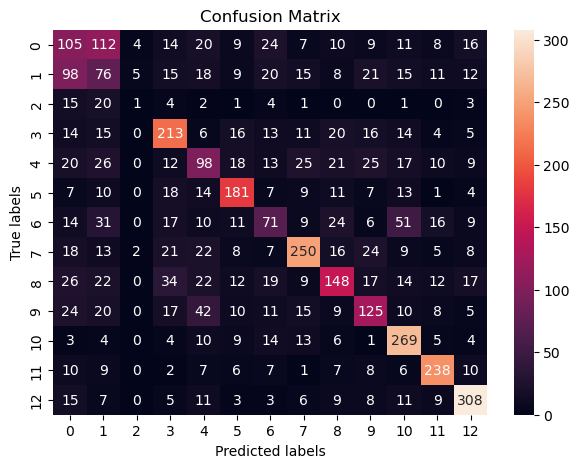

In [ ]:
# Confusion matrix for results
cm = confusion_matrix(test_labels, cnn_pred)

fig, ax = plt.subplots(figsize=(7, 5))
# annot=True to annotate cells. 'fmt' prevents the numbers from going to scientific notation
sns.heatmap(cm, annot=True, ax=ax, fmt='g')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [ ]:
# Creating a function which picks random images and identifies the class to which the image belongs
def get_image_and_class(size, categorys=categorys):
    # generating a random image from the test data
    idx = np.random.randint(len(test_images), size=size)
    for i in range(len(idx)):
        plt.imshow(test_images[idx[i]])
        plt.show()

        # Print the class of the random image picked above
        class_index = test_labels[idx[i]]
        print('This is a', categorys[class_index])

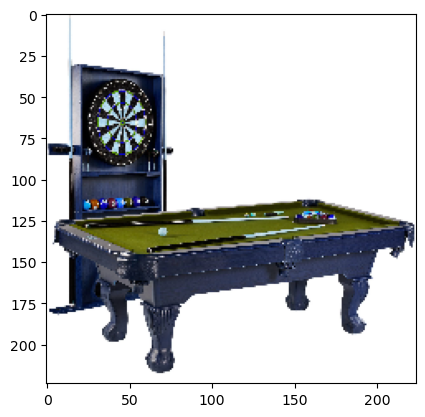

This is a boats


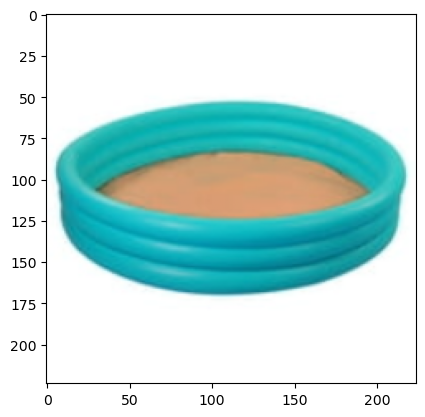

This is a Fishing


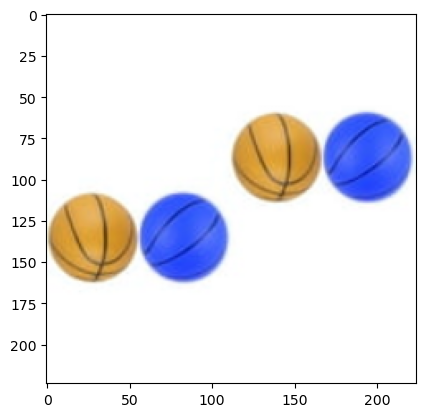

This is a sports_shooting


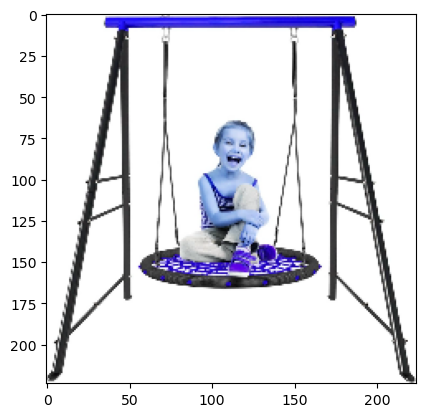

This is a swing_sets


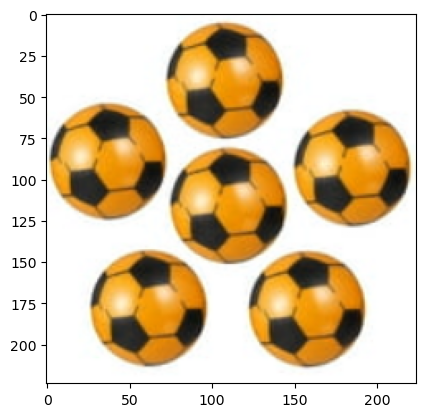

This is a Hunting


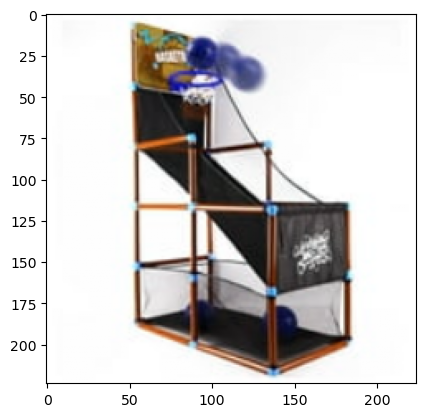

This is a trampoline


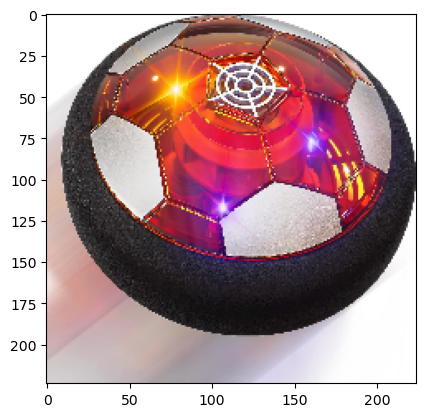

This is a Hunting


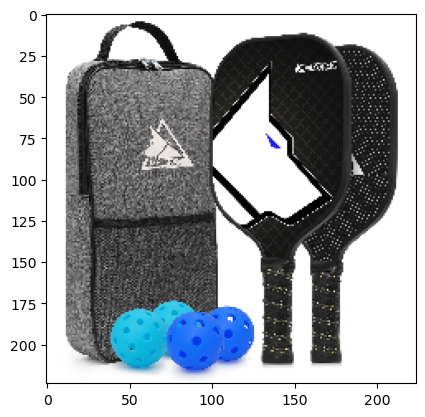

This is a Camping


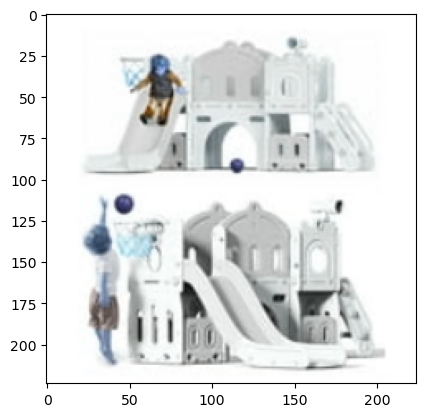

This is a basketball


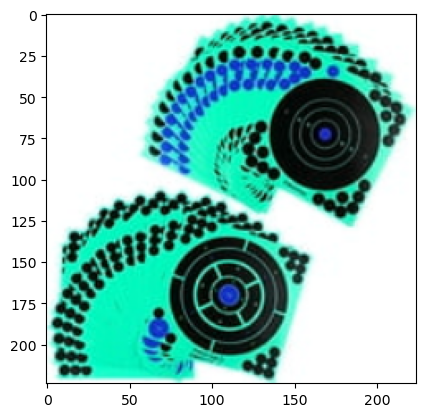

This is a soccer


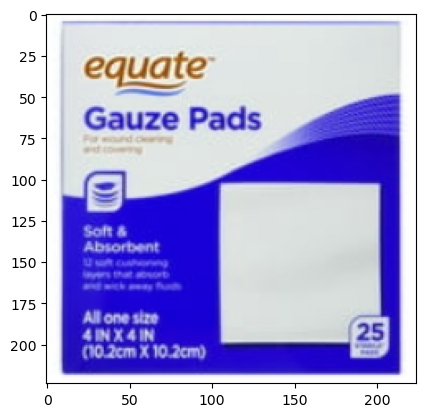

This is a boats


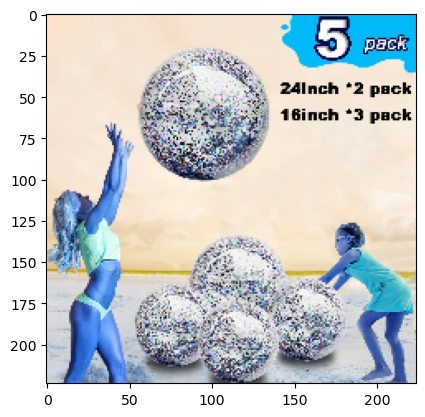

This is a football


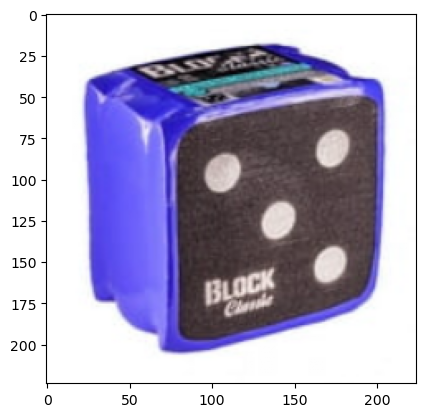

This is a soccer


In [ ]:
get_image_and_class(13, categorys)

---

## Recommendation System

### Load data


In [ ]:
import numpy as np
import pandas as pd
import requests
import urllib
import time
import json
import re
import cv2

from matplotlib import pyplot as plt

In [ ]:
image_data = np.load('./filter_data/image_array.npy')
data = pd.read_csv('./filter_data/filter_data.csv')

In [ ]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data

category                                              title
0        trampoline    Bounce Pro 14ft Trampoline With Enclosure Combo
1        trampoline  Bounce Pro 12' Trampoline with Enclosure Combo...
2        trampoline    Bounce Pro 14ft Trampoline with Flash Lite Zone
3        trampoline  YORIN Trampoline, 1200LBS 12FT 14FT 15FT 16FT ...
4        trampoline  Seizeen Outdoor Trampoline for Kids, 12FT Roun...
...             ...                                                ...
13376  outdoor_toys  stargo Sand Digger Kids Excavator Ride on Toy,...
13377  outdoor_toys  Costway Inflatable Bouncy Castle Kids Jumping ...
13378  outdoor_toys  Aljoin Trampoline Paddles for 4 Players,Bouncy...
13379  outdoor_toys  Princess Tent Girls Large Playhouse Kids Castl...
13380  outdoor_toys  Gorilla Playsets Ozark II Wooden Swing Set wit...

[13381 rows x 2 columns]

We will be using the VGG16 model, a popular deep learning architecture pre-trained on the ImageNet dataset, for feature extraction.
Architecture:
VGG16 Model consists of 16 convolutional layers organized into five blocks, with max-pooling layers interspersed between them. The convolutional layers use small 3x3 filters, and the max-pooling layers have a 2x2 window with a stride of 2. The final layers consist of three fully connected layers followed by a softmax layer for classification.


Our implementation start with loading the pre-trained VGG16 model with weights pre-trained on the ImageNet dataset.


In [ ]:
from tensorflow.keras.applications import vgg16
from tensorflow.keras.models import Model

# load the model
vgg_model = vgg16.VGG16(weights='imagenet')

# remove the last layers in order to get features instead of predictions
feat_extractor = Model(inputs=vgg_model.input,
                       outputs=vgg_model.get_layer("fc2").output)

# print the layers of the CNN
feat_extractor.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 29s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
imgs_features = feat_extractor.predict(image_data)

imgs_features.shape

419/419 ━━━━━━━━━━━━━━━━━━━━ 2205s 5s/step


(13381, 4096)

The cosine_similarity function computes the cosine similarities between pairs of image features stored in imgs_features. Cosine similarity measures the cosine of the angle between two vectors and is commonly used to determine similarity between vectors in high-dimensional spaces.

The computed cosine similarities are stored in a pandas DataFrame named cos_similarities. This DataFrame has image titles (presumably extracted from the data['title'] variable) as both row and column labels. Each cell in the DataFrame represents the cosine similarity between the corresponding pair of images.


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# compute cosine similarities between images
cosSimilarities = cosine_similarity(imgs_features)

# store the results into a pandas dataframe
cos_similarities = pd.DataFrame(
    cosSimilarities, columns=data['title'], index=data['title'])
cos_similarities

title                                               Bounce Pro 14ft Trampoline With Enclosure Combo  \
title                                                                                                 
Bounce Pro 14ft Trampoline With Enclosure Combo                                            1.000000   
Bounce Pro 12' Trampoline with Enclosure Combo,...                                         0.591140   
Bounce Pro 14ft Trampoline with Flash Lite Zone                                            0.592191   
YORIN Trampoline, 1200LBS 12FT 14FT 15FT 16FT T...                                         0.424900   
Seizeen Outdoor Trampoline for Kids, 12FT Round...                                         0.609376   
...                                                                                             ...   
stargo Sand Digger Kids Excavator Ride on Toy, ...                                         0.290122   
Costway Inflatable Bouncy Castle Kids Jumping H...                                         0.342049   
Aljoin Trampoline Paddles for 4 Players,Bouncy ...                                         0.297032   
Princess Tent Girls Large Playhouse Kids Castle...                                         0.249179   
Gorilla Playsets Ozark II Wooden Swing Set with...                                         0.328835   

title                                               Bounce Pro 12' Trampoline with Enclosure Combo, Blue/Yellow  \
title                                                                                                             
Bounce Pro 14ft Trampoline With Enclosure Combo                                              0.591140             
Bounce Pro 12' Trampoline with Enclosure Combo,...                                           1.000000             
Bounce Pro 14ft Trampoline with Flash Lite Zone                                              0.796597             
YORIN Trampoline, 1200LBS 12FT 14FT 15FT 16FT T...                                           0.532223             
Seizeen Outdoor Trampoline for Kids, 12FT Round...                                           0.679891             
...                                                                                               ...             
stargo Sand Digger Kids Excavator Ride on Toy, ...                                           0.322031             
Costway Inflatable Bouncy Castle Kids Jumping H...                                           0.303938             
Aljoin Trampoline Paddles for 4 Players,Bouncy ...                                           0.314035             
Princess Tent Girls Large Playhouse Kids Castle...                                           0.426355             
Gorilla Playsets Ozark II Wooden Swing Set with...                                           0.387825             

title                                               Bounce Pro 14ft Trampoline with Flash Lite Zone  \
title                                                                                                 
Bounce Pro 14ft Trampoline With Enclosure Combo                                            0.592191   
Bounce Pro 12' Trampoline with Enclosure Combo,...                                         0.796597   
Bounce Pro 14ft Trampoline with Flash Lite Zone                                            1.000000   
YORIN Trampoline, 1200LBS 12FT 14FT 15FT 16FT T...                                         0.501856   
Seizeen Outdoor Trampoline for Kids, 12FT Round...                                         0.701953   
...                                                                                             ...   
stargo Sand Digger Kids Excavator Ride on Toy, ...                                         0.357335   
Costway Inflatable Bouncy Castle Kids Jumping H...                                         0.381707   
Aljoin Trampoline Paddles for 4 Players,Bouncy ...                                         0.345509   
Princess Tent Girls Large Playh

In [ ]:
cos_similarities.to_csv('./product_similarity.csv')

---

### Recommend product with image


In [ ]:
image_data = np.load('./filter_data/image_array.npy')
cos_similarities = pd.read_csv('./product_similarity.csv')
data = pd.read_csv('./filter_data/filter_data.csv')
data.drop(['Unnamed: 0'], axis=1, inplace=True)

The below function image_recommend aims to recommend similar images to a given product image based on cosine similarities.


In [ ]:
import matplotlib.pyplot as plt


def image_recommend(pid, image_data, text_data, cos_similarities, num_recommend=5):

    title = text_data.iloc[pid]['title']
    product_img = image_data[pid]

    # Displaying the product- Title & Name

    print("-----------------------------------------------------------------------")
    print("Original product:")
    print("-----------------------------------------------------------------------")

    print("\nProduct ID : ", pid)
    print("Title : ", title)
    plt.imshow(product_img)
    plt.show()

    # Getting the indexes and scores of the N most similar products
    closest_imgs = cos_similarities[cos_similarities[title] < 0.99][title].sort_values(
        ascending=False)[1:num_recommend+1].index
    closest_imgs_scores = cos_similarities[cos_similarities[title] < 0.99][title].sort_values(
        ascending=False)[1:num_recommend+1]

    # Displaying the recommended products

    print("-----------------------------------------------------------------------")
    print("Most similar products:")
    print("-----------------------------------------------------------------------")

    for i in range(0, len(closest_imgs)):
        title = text_data.iloc[closest_imgs[i]]['title']
        print("Title : ", title)
        print("similarity score : ", list(closest_imgs_scores)[i])
        product_img = image_data[closest_imgs[i]]
        plt.imshow(product_img)
        plt.show()

-----------------------------------------------------------------------
Original product:
-----------------------------------------------------------------------

Product ID :  2000
Title :  Power-Pole Pro II Series - White 8ft (CM2.0)


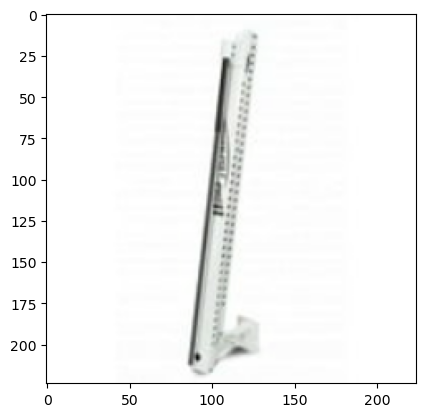

-----------------------------------------------------------------------
Most similar products:
-----------------------------------------------------------------------
Title :  Minn Kota Raptor Shallow Water Anchor w/Active Anchoring, 8'
similarity score :  0.7786445


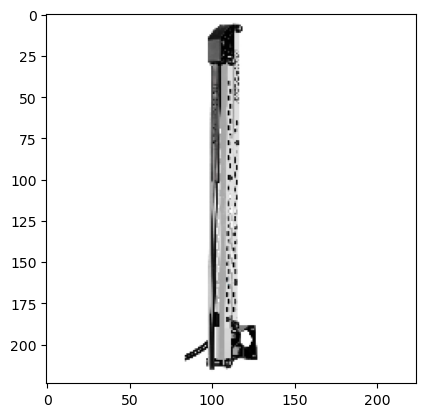

Title :  Minn Kota Raptor 8 Shallow Water Anchor - Black [1810600]
similarity score :  0.7758132


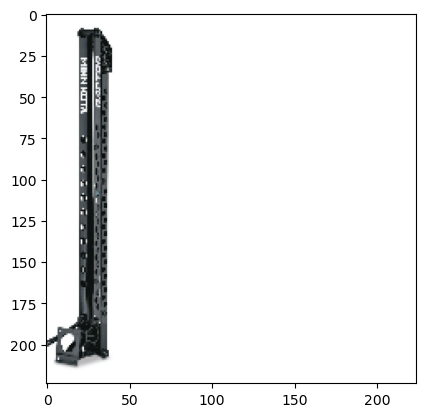

Title :  Shakespeare 5225-XT 8' VHFMounting Solutions
similarity score :  0.7292039


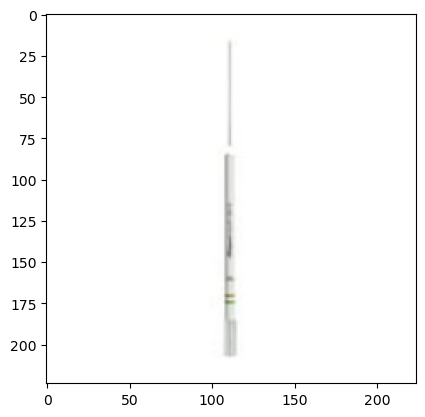

Title :  Minn Kota Raptor Shallow Water Anchor with Active Anchoring, 8'
similarity score :  0.712761


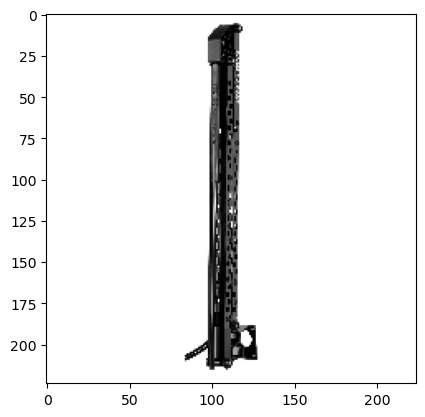

Title :  Intex Pool Maintenance Kit For Above Ground Pool
similarity score :  0.6886103


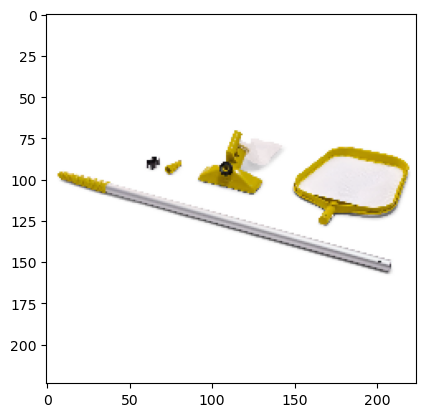

In [ ]:
image_recommend(2000, image_data, data, cos_similarities)

-----------------------------------------------------------------------
Original product:
-----------------------------------------------------------------------

Product ID :  2222
Title :  Kemimoto Boat Fenders Boat Bumpers for Docking Upgraded Boat Fenders Bumpers, Fit for Bass Boat and Jon Boat, etc,Patent Product (17.3" ×9.4", 2Pack)


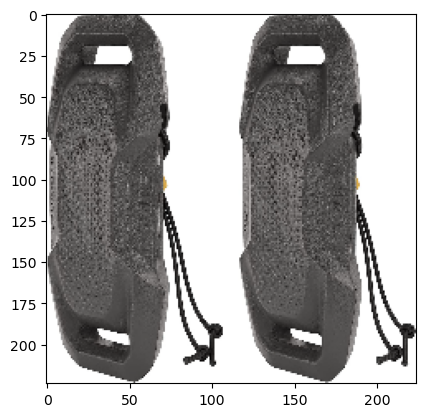

-----------------------------------------------------------------------
Most similar products:
-----------------------------------------------------------------------
Title :  Franklin Sports Pickleball Sling Bag  Official Pickleball Bag of the U.S. Open Pickleball Championships  Adjustable  Charcoal Gray
similarity score :  0.6449519


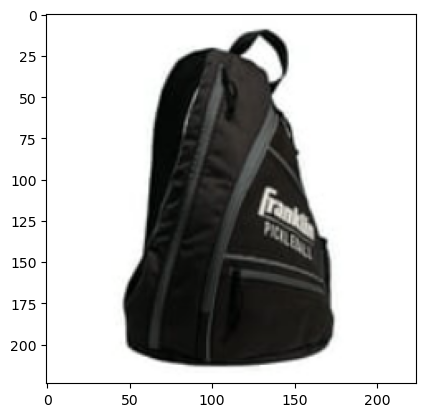

Title :  Franklin Sports Pickleball Sling Bag  Official Pickleball Bag of the U.S. Open Pickleball Championships  Adjustable  Gray/Blue
similarity score :  0.6416321


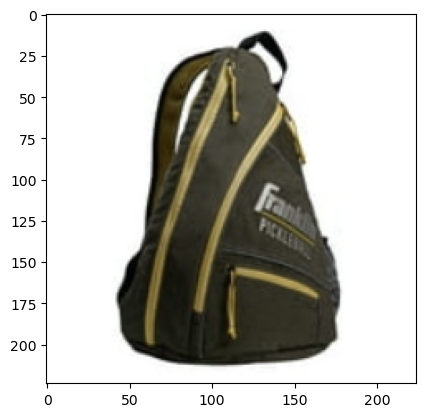

Title :  ORCA Wynd Nomex Black Pickleball Paddle with Carrying Bag, 7.3oz
similarity score :  0.63879526


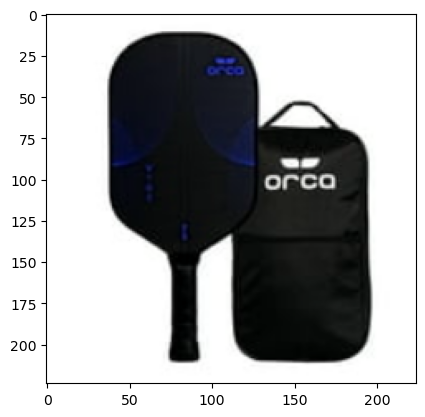

Title :  Fule Pickleball Sling Bag Empty with Extra Storage Space Adjustable Carrying Case
similarity score :  0.6335813


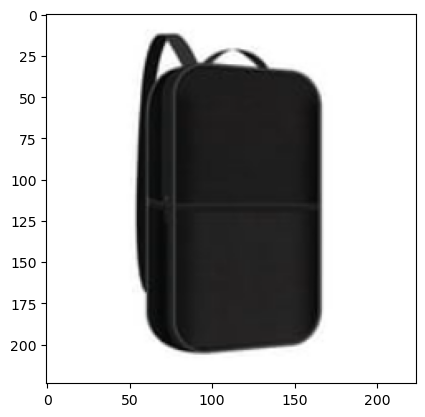

Title :  Pickleball Paddles with 2 Rackets 4 Balls and Storage Bag Pickleball Rackets Black
similarity score :  0.6172401


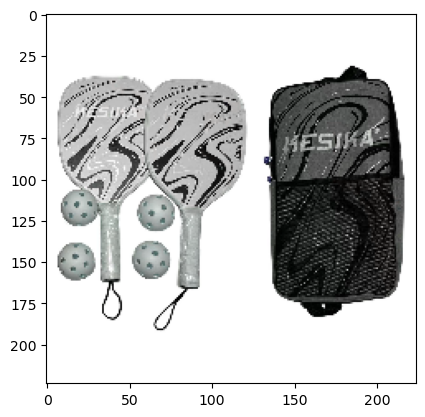

In [ ]:
image_recommend(2222, image_data, data, cos_similarities)

## Title-based Recommendation


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

We uses CountVectorizer from scikit-learn to convert the text data (titles) into numerical vectors. Stop words in English are removed during vectorization to filter out common words.
The fit_transform method is applied to fit the vectorizer to the text data and transform it into a matrix of token counts.


In [ ]:
title_vectors = CountVectorizer(stop_words='english')
title_vectorized = title_vectors.fit_transform(data['title'])

This method recommends similar products based on the textual information (titles) using cosine similarity.


In [ ]:
def title_recommend(pid, num_recommend):
    """
    PID: Product ID of the original item in our dataset
    num_recommend : Number of most similar items to retrieve
    Returns product ID, title, and similarity score of the recommended items
    """
    title_sim = cosine_similarity(title_vectorized, title_vectorized)

    # initializing the empty list for recommended products and similarity score
    recommended_prod = []

    # Displaying the original product- PID, Name
    print("-----------------------------------------------------------------------")
    print("Original product:")
    print("-----------------------------------------------------------------------")
    print("Product ID : ", pid)
    print("Title : ", data.iloc[pid]['title'])

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(title_sim[pid]).sort_values(ascending=False)

    # getting the indexes and scores of the N most similar products
    top_indexes = list(score_series.iloc[1:(num_recommend+1)].index)
    top_score = list(score_series.iloc[1:(num_recommend+1)])

    # Displaying the recommended products- PID, Name, and Similarity Score
    print("\n")
    print("-----------------------------------------------------------------------")
    print("Most similar products:")
    print("-----------------------------------------------------------------------")

    for i in range(0, len(top_score)):
        recommended_prod.append(data['title'].iloc[top_indexes[i]])
        print("\nProduct ID : ", top_indexes[i])
        print("Title : ", data['title'].iloc[top_indexes[i]])
        print("Similarity score : ", top_score[i])

In [ ]:
title_recommend(2000, 5)

-----------------------------------------------------------------------
Original product:
-----------------------------------------------------------------------
Product ID :  2000
Title :  Power-Pole Pro II Series - White 8ft (CM2.0)


-----------------------------------------------------------------------
Most similar products:
-----------------------------------------------------------------------

Product ID :  4735
Title :  Electrum Pro II Pickleball Paddle
Similarity score :  0.3162277660168379

Product ID :  4775
Title :  CRBN 2X Power Series Pickleball Paddle
Similarity score :  0.2886751345948129

Product ID :  5584
Title :  Pro Series Pickleball Paddle Bag by Franklin Sports - Pro Player Christine McGrath Edition
Similarity score :  0.28347335475692037

Product ID :  10951
Title :  Reebok Men's Pro Series Crew Socks, 6-Pack
Similarity score :  0.26726124191242434

Product ID :  10992
Title :  Reebok Men's Pro Series Crew Socks, 6-Pack
Similarity score :  0.26726124191242434


---

### Recommend product with combined image and title


To improve recommendation, we designed the combined_recommend function combines both textual (word-2-vec) and image features to recommend similar products, allowing to specify weights for each feature type.


In [ ]:
def combined_recommend(pid, image_data, text_data, cos_similarities,
                       w1, w2, num_recommend=5):
    """
    PID: Product ID of the original item in our dataset
    num_recommend : Number of most similar items to retrieve
    w1 : Weight for the word-2-vec feature - Product name
    w2 : Weight for the word-2-vec feature - brand features

    Returns product ID, title, image and similarity score of the recommended items
    """
    title = text_data.iloc[pid]['title']
    product_img = image_data[pid]

    # Displaying the product- Title & Image

    print("-----------------------------------------------------------------------")
    print("Original product:")
    print("-----------------------------------------------------------------------")

    print("\nProduct ID : ", pid)
    print("Title : ", title)
    plt.imshow(product_img)
    plt.show()

    # Displaying the recommended products

    print("-----------------------------------------------------------------------")
    print("Most similar products:")
    print("-----------------------------------------------------------------------")

    title_sim = cosine_similarity(title_vectorized, title_vectorized)[pid]
    image_sim = np.array(cos_similarities.iloc[pid])[1:]
    w1 = float(w1)  # Convert w1 to a float
    w2 = float(w2)
    total_sim = (w1 * title_sim + w2 * image_sim)/(w1 + w2)

    # initializing the empty list for recommended products and similarity score
    recommended_prod = []

    # Displaying the original product- PID, Name, Brand
    print("-----------------------------------------------------------------------")
    print("Original product:")
    print("-----------------------------------------------------------------------")
    print("Product ID : ", pid)
    print("Title : ", data.iloc[pid]['title'])

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(total_sim).sort_values(ascending=False)

    # getting the indexes and scores of the N most similar products
    top_indexes = list(score_series.iloc[1:(num_recommend+1)].index)
    top_score = list(score_series.iloc[1:(num_recommend+1)])

    # Displaying the recommended products- PID, Name, Brand and Similarity Score
    print("\n")
    print("-----------------------------------------------------------------------")
    print("Most similar products:")
    print("-----------------------------------------------------------------------")

    for i in range(0, len(top_score)):
        recommended_prod.append(list(data['title'].iloc[top_indexes[i]]))
        print("\nProduct ID : ", top_indexes[i])
        print("Title : ", data['title'].iloc[top_indexes[i]])
        print("Similarity score : ", top_score[i])
        product_img = image_data[top_indexes[i]]
        plt.imshow(product_img)
        plt.show()

-----------------------------------------------------------------------
Original product:
-----------------------------------------------------------------------

Product ID :  2222
Title :  Kemimoto Boat Fenders Boat Bumpers for Docking Upgraded Boat Fenders Bumpers, Fit for Bass Boat and Jon Boat, etc,Patent Product (17.3" ×9.4", 2Pack)


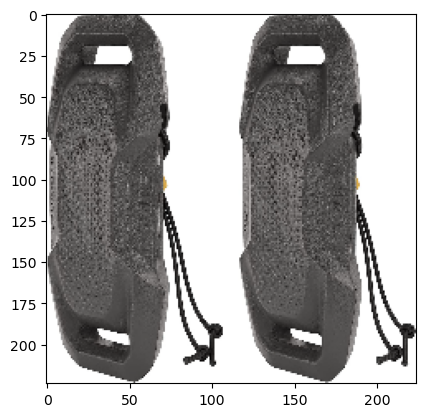

-----------------------------------------------------------------------
Most similar products:
-----------------------------------------------------------------------
-----------------------------------------------------------------------
Original product:
-----------------------------------------------------------------------
Product ID :  2222
Title :  Kemimoto Boat Fenders Boat Bumpers for Docking Upgraded Boat Fenders Bumpers, Fit for Bass Boat and Jon Boat, etc,Patent Product (17.3" ×9.4", 2Pack)


-----------------------------------------------------------------------
Most similar products:
-----------------------------------------------------------------------

Product ID :  2106
Title :  Walmeck Inflatable Boat,Series Thick Inflatable Leisure Boat Person Water Play Inflatable Boat Leisure Boat not Water Play Boat not Included) Boat Series Thick Rookin QAHM BUZHI
Similarity score :  0.5455098768479745


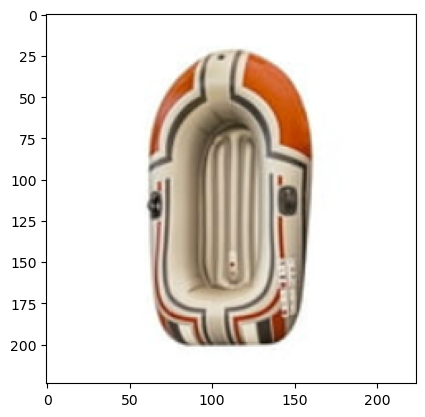


Product ID :  2063
Title :  OWSOO canoe,Summer Fun Boat Inflatable Boat Canoe One Person Boat Canoe One BUZHI Boat HUIOP Inflatable SHUBIAO
Similarity score :  0.5045355966652093


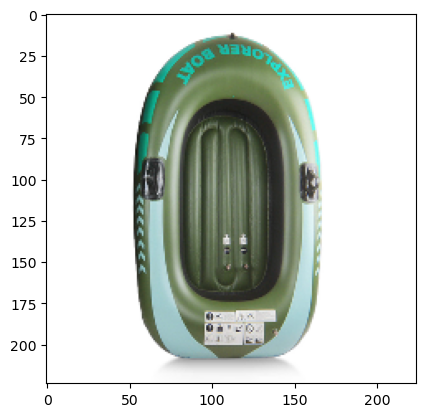


Product ID :  1632
Title :  Ozark Trail 4.5" x 16" Inflatable Boat Bumper Marine Boat Fender, Black
Similarity score :  0.4988642998976872


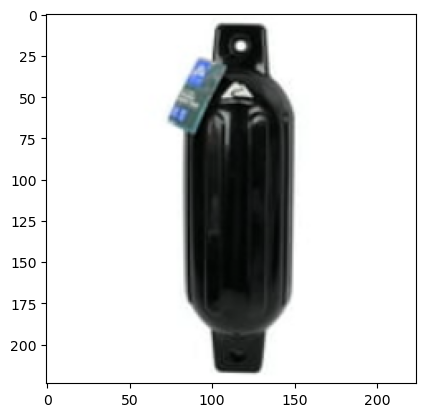


Product ID :  1510
Title :  Ozark Trail 5.5" x 20" Inflatable Boat Bumper Marine Boat Fender, Black
Similarity score :  0.49869211189768714


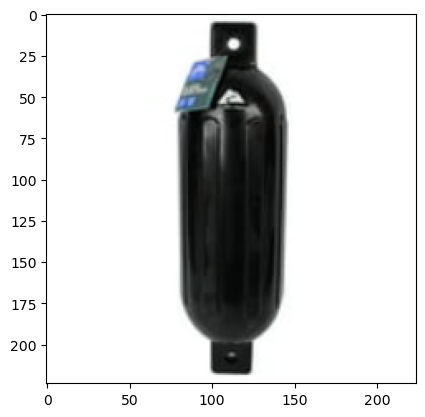


Product ID :  1543
Title :  Ozark Trail 5.5" x 20" Inflatable Boat Bumper Marine Boat Fender, Black
Similarity score :  0.49869211189768714


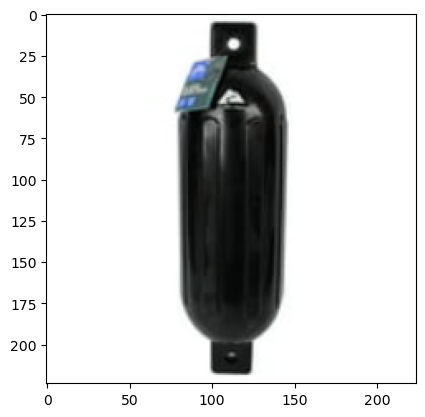

In [ ]:
combined_recommend(2222, image_data, data, cos_similarities, 0.6, 0.4)

### Result

From looking at the recommended results for the same product using different methods, we could tell that the combined method of using both image and textual information works the best. It provides a versatile tool for building recommendation systems that leverage multiple types of data to provide more accurate and personalized recommendations.


---

### **Conclusion**

**Image classification**

Overall, our model shows reasonable training performance (72.02% accuate) but limited generalization to validation and test data (52.29%).

This performance gap suggests that the model may be overfitting despite early stopping, highlighting the need for further optimization. To enhance performance, exploring advanced model architectures, implementing data augmentation, applying regularization techniques, and conducting thorough hyperparameter tuning are recommended.

Also, we aim to get more data for each categories, hoping to improve the accuracy of our model.

**Recommender system**

From analyzing the recommended results for the same product using various methods, it's evident that the combined approach of utilizing both image and textual information yields the best outcomes. This integrated method enhances recommendation systems by leveraging multiple data types, leading to more precise suggestions.

Our main limitation is the lack of users' data. We can only recommend product using item-based method, we can't make personalized recommendation. Also, we don't have the users feedback to validate the performance of our recommendation.
By getting users ratings/purchase history, we can make more personalized and precise recommendation.


### **Future work**

Based on the result/experience, we aim to improve our project by:

- Include more categories for the image classification
- Get more data for each categories to improve the accuracy
- Get the users’ buying history for the recommender system
- Wrap up two models and deploy application (Flask)


### **Medium Post**
- Link: https://medium.com/@tyin7_6343/image-classification-and-recommendation-system-on-walmart-products-31706aed0cd9

### **Recorded Presentation**:
- Link: https://youtu.be/JYi-PM0YxQw?si=rOvGS_WVALuTJ-T5